In [65]:
import seaborn as sns
import pandas as pd
import torch
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#imports 
from src.preprocessing import *
from src.models import deepcat_cnn
from src.train_eval_helpers import *
#from src.dataloader import *
from src.plots import * 

mpl.rcParams['figure.dpi']= 300
sns.set_style('darkgrid')

In [75]:
if 'notebook' in PATH:
    with open('../src/AAidx_dict.pkl', 'rb') as f: 
        AAidx_Dict = pickle.load(f) 
    with open('../src/merged_dict.pkl', 'rb') as g: 
        merged_dict = pickle.load(g) 

elif 'src' in PATH :
    with open('./AAidx_dict.pkl', 'rb') as f: 
        AAidx_Dict = pickle.load(f) 
    with open('./merged_dict.pkl', 'rb') as g: 
        merged_dict = pickle.load(g) 
else :
    with open('./src/AAidx_dict.pkl', 'rb') as f: 
        AAidx_Dict = pickle.load(f) 
    with open('./src/merged_dict.pkl', 'rb') as g: 
        merged_dict = pickle.load(g) 

In [74]:
deepcat_cnn(12)

deepcat_cnn(
  (conv1): Conv2d(1, 8, kernel_size=(15, 2), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(1, 2), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(1, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(1, 2), stride=(1, 1), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

In [22]:
a = read_seq('../TrainingData/NormalCDR3.txt')[0][0:-1]
aa_encode = aaindex_encoding(a, 'cpu').squeeze(0)
atchley = aaidx_atchley_encoding(a, 'cpu').squeeze(0)

In [24]:
aa_encode.shape

torch.Size([15, 12])

In [36]:
cols = ['AA_'+str(x) for x in range(1,13)]
index = ['PCA_'+str(x) for x in range(1,16)]
aa_df = pd.DataFrame(aa_encode.numpy(), index= index, columns= cols)
atchley_df = pd.DataFrame(atchley.numpy(), index = ['I','II','III','IV','V']+index, columns=cols)


,AA_1,AA_2,AA_3,AA_4,AA_5,AA_6,AA_7,AA_8,AA_9,AA_10,AA_11,AA_12
PCA_1,-8.369183,-0.970906,11.852741,11.852741,-17.636238,11.706589,16.217047,14.869761,4.530299,12.031599,-0.970906,-18.595728
PCA_2,8.303193,-0.323681,6.884602,6.884602,-0.352396,-13.644886,15.091270,1.570624,5.126549,-13.301219,-0.323681,0.922355
PCA_3,-6.619669,15.720652,2.967259,2.967259,11.839243,2.136219,-8.723207,-3.623218,1.436060,8.279954,15.720652,-3.317433
PCA_4,13.873414,-0.508841,3.629019,3.629019,-5.375409,-2.016053,-18.777500,5.636724,1.768437,-2.196388,-0.508841,-2.521746
PCA_5,8.595313,3.740219,-2.886193,-2.886193,-1.159547,-6.380686,6.464781,-1.783961,-3.393348,8.483089,3.740219,-0.451259
PCA_6,9.799149,-0.778797,2.323822,2.323822,-1.972402,0.812261,4.562450,-3.627368,5.243609,-2.020041,-0.778797,-4.091534
PCA_7,1.269112,3.386677,-1.338302,-1.338302,0.855139,4.378572,3.055578,-1.446525,-3.364481,-4.581659,3.386677,-0.399321
PCA_8,-4.637529,-0.913063,3.316768,3.316768,0.530557,-1.649608,0.156904,5.399453,2.200626,-2.685265,-0.913063,2.411224
PCA_9,-0.983922,3.006148,6.263732,6.263732,2.120176,1.425405,-0.669300,0.876169,6.526853,-2.604248,3.006148,-1.083641
PCA_10,4.363424,-2.329199,-0.897893,-0.897893,4.051676,8.600942,0.733899,4.112877,-4.746091,-0.132283,-2.329199,-1.470725


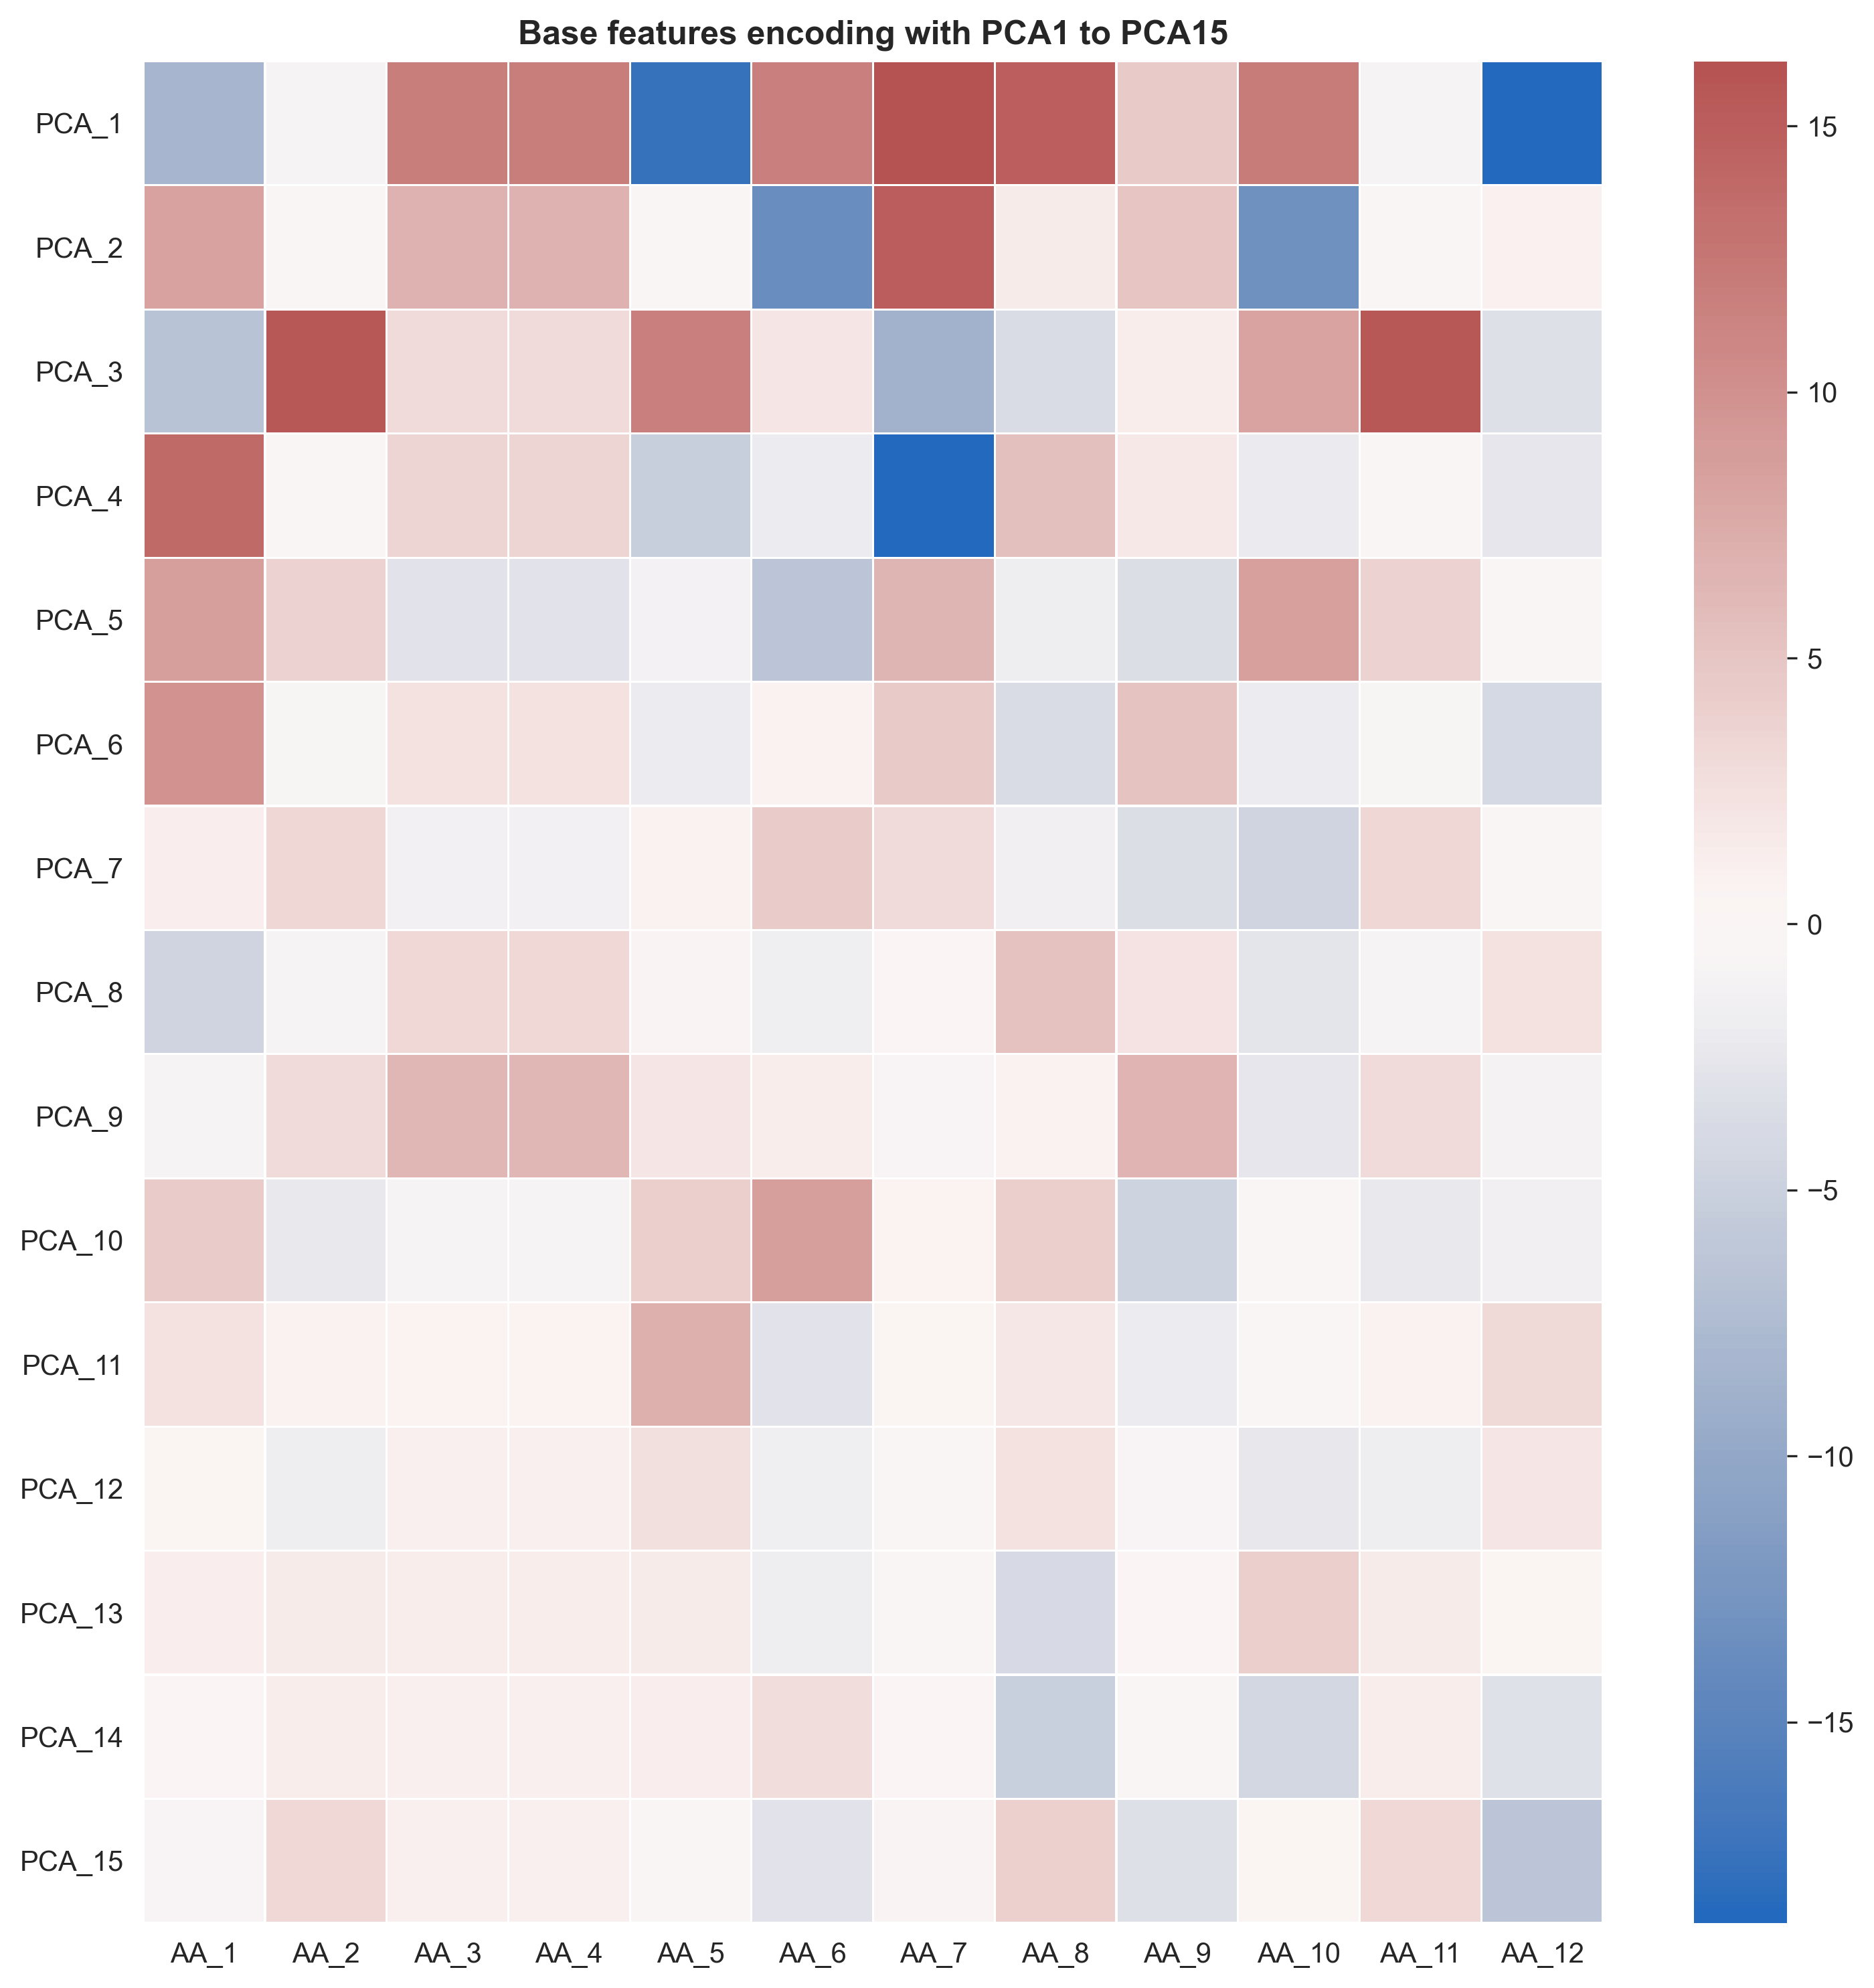

In [72]:
#sns.set_palette("vlag", as_cmap=True)
f,a = plt.subplots(figsize=(10,10))
a.set_title('Base features encoding with PCA1 to PCA15', fontweight='bold')
sns.heatmap(data=aa_df, ax=a, center=0, linewidth=.5,
            cmap=sns.color_palette('vlag', as_cmap=True))#,square=True)#), as_cmap =True))
f.tight_layout()
f.savefig('../base_features.jpg',dpi=300)

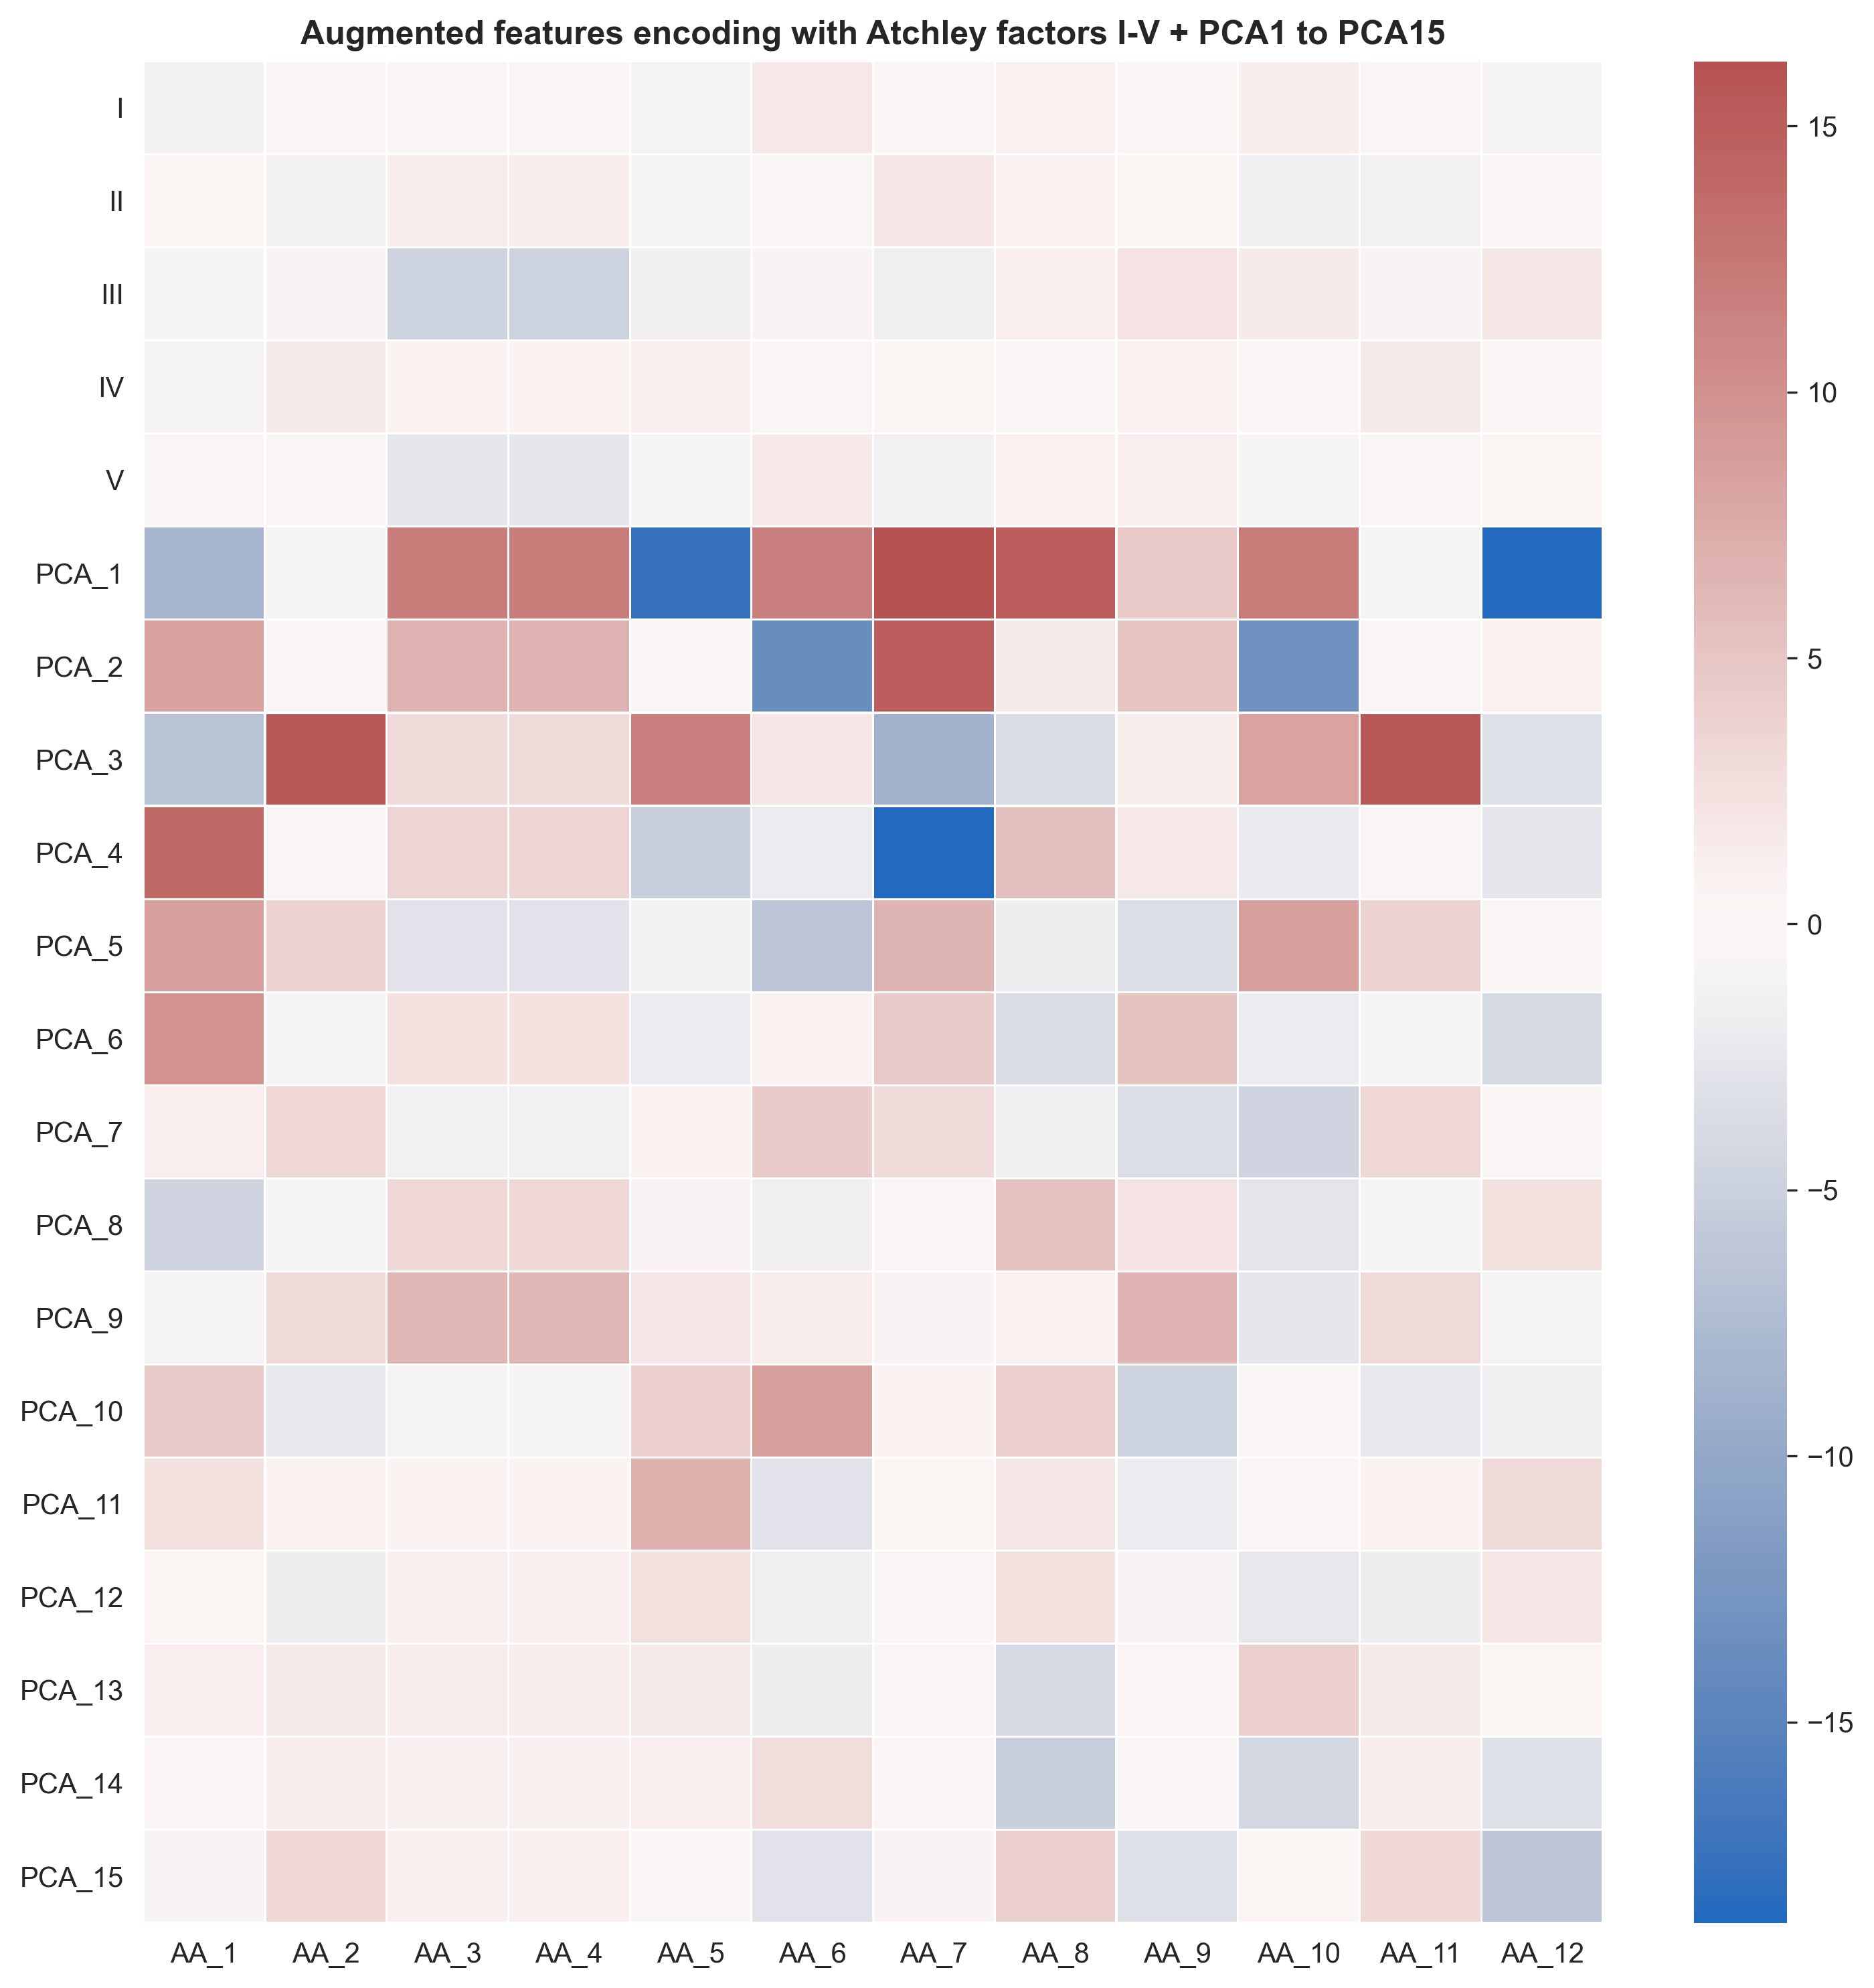

In [73]:
f ,a = plt.subplots(figsize=(10,10))
a.set_title('Augmented features encoding with Atchley factors I-V + PCA1 to PCA15', fontweight='bold')
sns.heatmap(data=atchley_df, ax=a, center=0, linewidth=.5,
            cmap=sns.color_palette('vlag', as_cmap=True))#,square=True)#), as_cmap =True))
f.tight_layout()

f.savefig('../augmented_features.jpg',dpi=300)

In [92]:
data

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
PCA_1,-0.970906,-8.369183,18.126266,12.031599,-18.595729,14.839209,0.688054,-20.340847,11.706589,-17.636238,-15.596546,14.869761,16.217047,7.921096,8.538146,11.852741,4.530299,-16.014413,-16.297686,-7.499260
PCA_2,-0.323681,8.303193,-2.147382,-13.301219,0.922355,19.241389,-6.179566,4.143847,-13.644886,-0.352396,-5.745969,1.570624,15.091270,-8.696665,-13.787458,6.884602,5.126549,5.493046,-3.907699,1.310045
PCA_3,15.720652,-6.619669,-0.252170,8.279954,-3.317433,5.934388,-6.805506,3.863943,2.136219,11.839243,1.056549,-3.623218,-8.723206,-0.597017,-4.770628,2.967260,1.436060,7.345058,-13.792555,-12.077922
PCA_4,-0.508841,13.873414,2.313661,-2.196389,-2.521746,5.667384,3.947465,-3.405045,-2.016053,-5.375409,1.825813,5.636724,-18.777500,0.020463,-1.164494,3.629019,1.768437,-0.712585,-0.843258,-1.161061
PCA_5,3.740219,8.595313,6.524064,8.483090,-0.451259,-5.818831,1.332976,-2.789928,-6.380686,-1.159547,6.652366,-1.783961,6.464781,0.930264,-9.465614,-2.886193,-3.393349,-4.031712,2.332647,-6.894639
PCA_6,-0.778797,9.799148,-4.883865,-2.020041,-4.091534,-8.788667,-0.512113,1.460826,0.812261,-1.972402,-1.219963,-3.627368,4.562450,2.565655,6.792443,2.323822,5.243609,5.607450,-8.041873,-3.231040
PCA_7,3.386677,1.269112,-9.138281,-4.581659,-0.399321,5.739142,4.737831,-4.070885,4.378572,0.855139,6.877496,-1.446525,3.055578,1.145548,1.989710,-1.338302,-3.364481,-4.734734,0.501865,-4.862481
PCA_8,-0.913063,-4.637529,-0.710244,-2.685265,2.411224,-4.728492,8.747224,0.583872,-1.649608,0.530557,2.804809,5.399453,0.156904,0.505002,-5.152740,3.316768,2.200626,-0.446560,-6.421089,0.688152
PCA_9,3.006148,-0.983922,-2.102955,-2.604248,-1.083641,-4.203332,-3.124012,-3.413380,1.425405,2.120176,-1.907467,0.876169,-0.669300,0.714673,-2.937721,6.263732,6.526853,-2.681175,7.232735,-2.454738
PCA_10,-2.329199,4.363424,-1.278654,-0.132283,-1.470725,-1.564928,-1.575982,1.846256,8.600941,4.051676,-3.590992,4.112878,0.733899,0.044386,-5.892070,-0.897893,-4.746091,-0.631768,-1.125217,1.482340


Text(0.5, 1.0, 'AA_index encoding matrix')

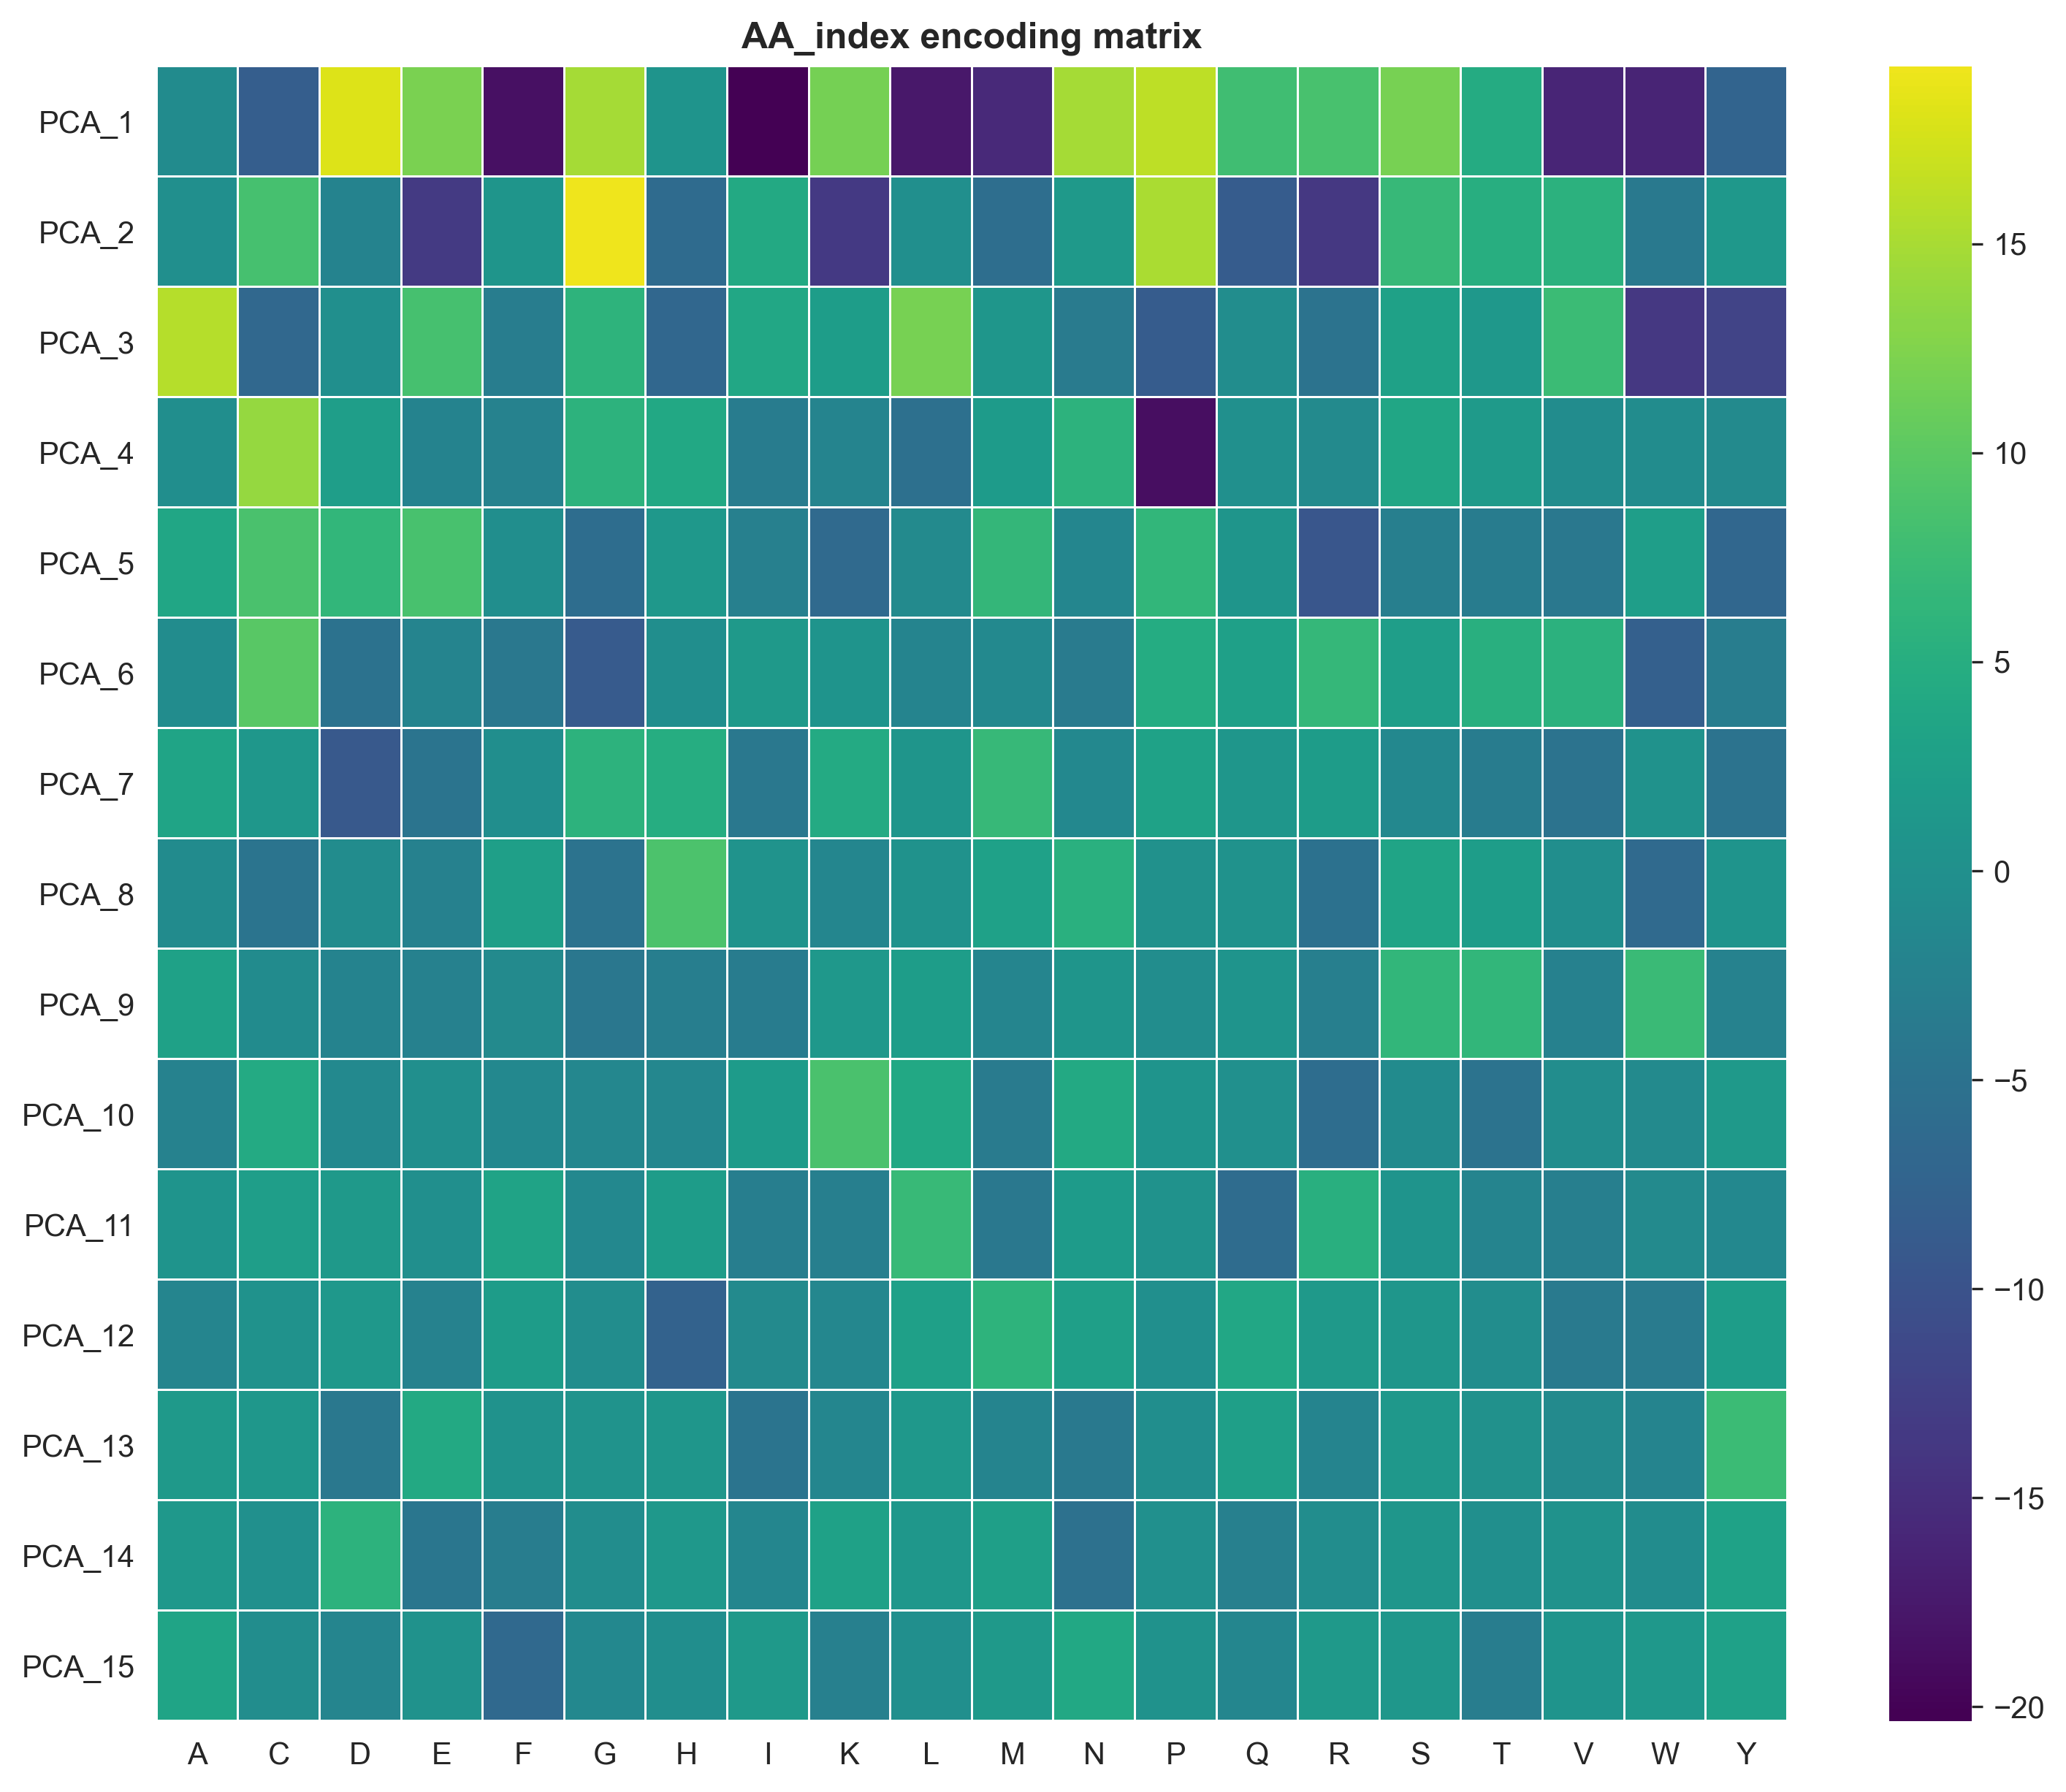

In [98]:
data=pd.DataFrame.from_dict(AAidx_Dict)[list(merged_dict.keys())]
data.index = index
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=data, ax=ax, center=0, linewidth=.5,
            cmap=sns.color_palette('viridis', as_cmap=True))
ax.set_title('AA_index encoding matrix',fontweight='bold')